# **Homework IV**
##### Grupo 41
##### Raquel Rodrigues (NºIST 106322) e Leonor Figueira (NºIST 106157)

## II. Programming and critical analysis

#### Pergunta 1)

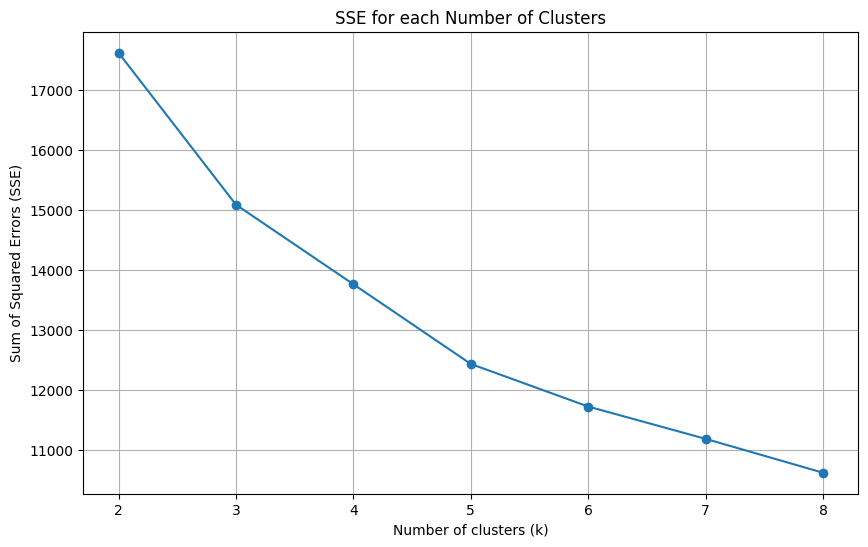

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('accounts.csv')

# Select the first 8 features
data = df.iloc[:, :8]

# Remove duplicates and null values
data = data.drop_duplicates()
data = data.dropna()

# Change the feature type from categorical to numerical 
data = pd.get_dummies(data, drop_first=True)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Define the range of k values (number of clusters)
k_values = [2,3,4,5,6,7,8]

# Store SSE values
sse = []

# Apply K-Means for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42, init='random')
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared errors (SSE)


# Plot the SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE for each Number of Clusters')
plt.grid(True)
plt.show()